In [118]:
# A module can be installed from within the notebook by 
# typing the following command


#!pip install sklearn

In [119]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [120]:
auto = pd.read_csv('Car_Purchasing_Data.csv')
print(auto.head())

     Customer Name                                    Customer e-mail Country  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA   
1    Harlan Barnes                                eu.dolor@diam.co.uk     USA   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...     USA   
3  Jade Cunningham                            malesuada@dignissim.com     USA   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net     USA   

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4  

In [121]:
print(auto.shape)


(500, 9)


In [122]:
auto.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [123]:
print(auto.columns)
print(auto.dtypes)

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')
Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object


### What's our goal

We have 9 columns. The dependent column is Car Purchase Amount. 

Since Customer Name, Customer e-mail and Country columns are catergorical variables and will not have any bearing on our prediction we will drop these columns now. 

Goal: We want to find a linear equation so that we can predict Car Purchase Amount. 

We will consider: Gender, Age, Annual Salary, Credit Card Debt and Net Worth as independent variables and Car Purchase Amount will be our dependent varaible also known as target variable. 



In [124]:
# dropping 

auto.drop(["Customer Name", "Customer e-mail", "Country"], axis=1, inplace=True)

#df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)

print(auto.shape)

print(auto.columns)

(500, 6)
Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')


What is correlation? 

Correlation describes the linear relationship between two variables. 

Correlation coefficient is a value that describes the strenght of the 
relationship between two variables. 

Correlation graph

<img src="correlation_graph.png" width=400, height=300>

Correlation coefficient formula

<img src="correlation_formula.png" width=400, height=300>

Values of $r$ range from -1 to 1, -1 represents negative correlation, 1 represents positive correlation. 

Reference - https://www.wallstreetmojo.com/correlation-coefficient-formula/

Which features to select?

Choose features that are not correlated. 

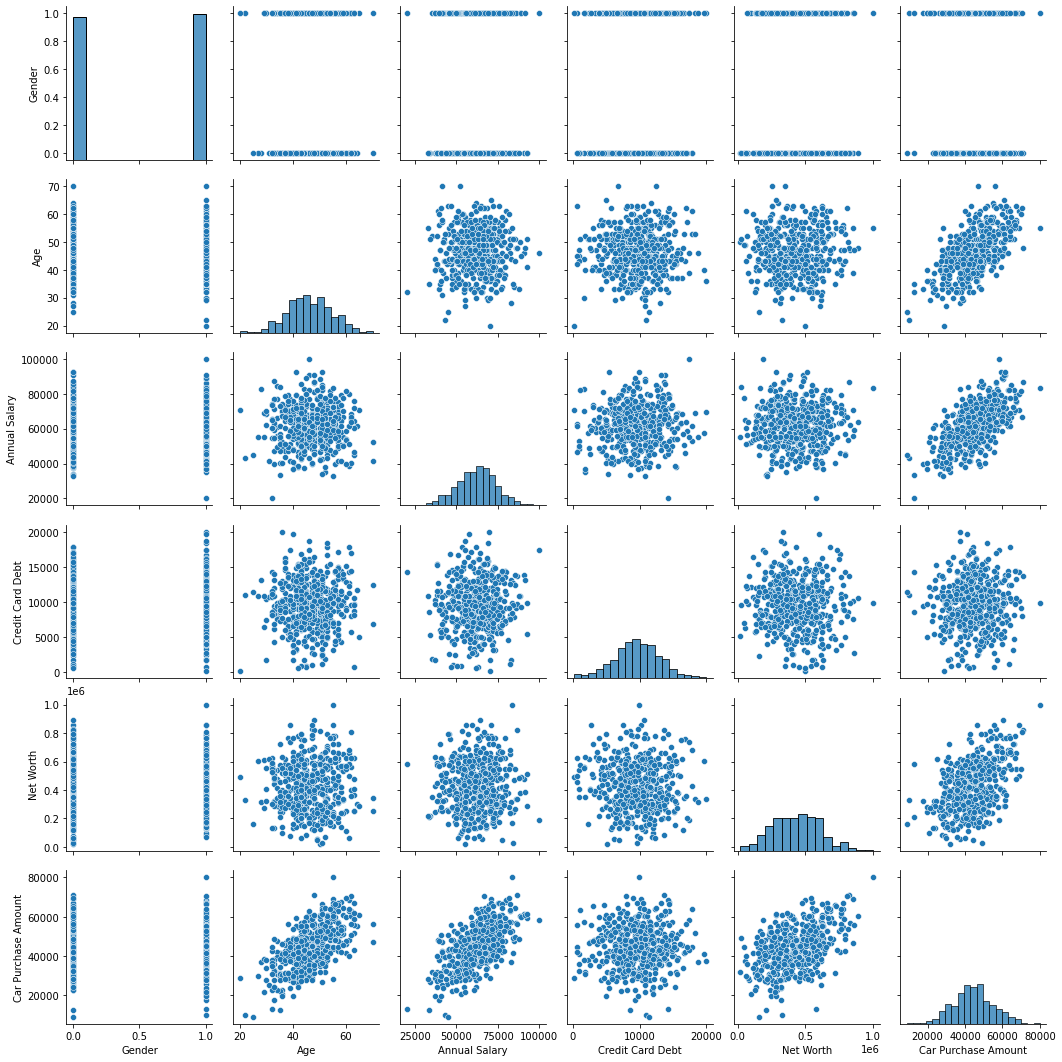

In [125]:
# library
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(auto)
plt.show()

(6.5, -0.5)

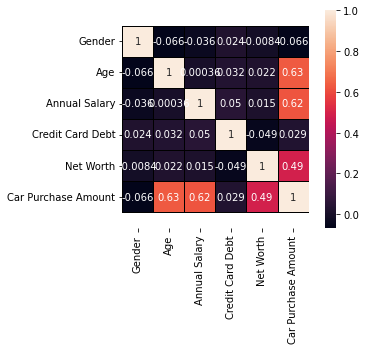

In [126]:
matrix = np.triu(auto.corr())

ax = sns.heatmap(auto.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black') #, mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

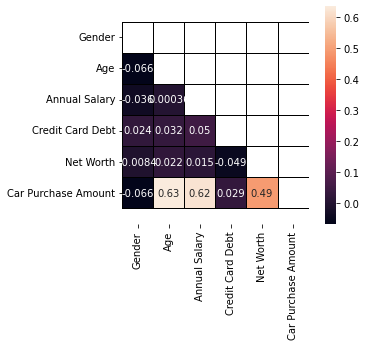

In [127]:
matrix = np.triu(auto.corr())

ax = sns.heatmap(auto.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Let's list which variables are correlated with which:

### Multilinear Regression

In a multilinear regression, instead of one independent variable, we will consider more than one independent variable to find a linear relationship between independent variables and dependent variable. We will consider 5 independent variables to find a linear relationship between them and our target variable, Car Purchase Amount. 

In [128]:
# creating an instance of LinearRegression class
reg = linear_model.LinearRegression()
print(reg)

LinearRegression()


#### Explanation

x = displacement and cylinder

y = mpg

Goal: get a linear relationship between y and x.

How many rows are there? 398

The data is split so that we can use majority for training the model. Once the model is trained, we use the remaining data that was not used to test the model. 

y = y_known

using the model we can y_predict.


train_test_split() will return 4 things: x_train, x_test, y_train, y_test


x_1  y_1

x_2  y_2

x_3  y_3

x_4  y_4

x_5  y_5


x_train = [x_1, x_2,x_3,x_4]
y_train = [y_1,y_2,y_3,y_4]

x_test = [x_5]
y_test = [y_5] 

In [129]:
print("Car Purchase min Amount: ", min(auto["Car Purchase Amount"]))

print("Car purchase max Amount: ", max(auto["Car Purchase Amount"]))

Car Purchase min Amount:  9000.0
Car purchase max Amount:  80000.0


#### Standard Scaler

We have to plot each feature and see if the distribution is normal. If yes, they we can perfrom standard scaler so that 
the mean will be zero and standard deviation will be 1. 

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
a_scaler = StandardScaler() # creating an instance of Standard Scaler

In [132]:
auto_independent = a_scaler.fit_transform(auto[['Age','Annual Salary', 'Credit Card Debt', 'Net Worth']])

In [133]:
# using train_test_split(), we are splitting the data into training and test 
# x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(auto_independent, auto["Car Purchase Amount"], test_size=0.2, random_state=4)

In [134]:
# we have to fit the data
reg.fit(x_train, y_train)

LinearRegression()

In [135]:
# y = mx + b here m is the coefficient (or slope) of x 
# and b is the intercept

print(reg.coef_) # 
print(reg.intercept_)

[6698.49987763 6568.62278558   20.6676723  5020.44202563]
44203.966801967785


# the relationship between the independent and dependent variables is 
purchase = 6698.499 * age + 6568.622 * salary + 20.667 * debt + 5020.44 * worth + 44203.967

#### Metrics for Linear Regression

Mean Squared Error 

For linear regresion with one variable, $ y = mx +b  = wx + b$

$ MSE = \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $ 

$y_i$ is the actual value and $mx_i + b$ is the predicted value.

$N$ is the number of observations.

The loss function based on the MSE is 

$ L(m, b) = \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $ 

our goal is to minimize $L$ with respect to $m$ and $b$

The gradient of $L$

$L'(m, b) = \begin{bmatrix} \frac{dL}{dm} \\ \frac{dL}{db} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum -x_i.2(y_i - (mx_i + b))  \\ \frac{1}{N} \sum -2(y_i - (mx_i + b))  \end{bmatrix}$ 

Update equation of m and b with learning rate $\epsilon$ is

$ m_{new} = m_{old} - \epsilon \frac{dL}{dm} (m_{old}) $

$ b_{new} = b_{old} - \epsilon \frac{dL}{db} (b_{old})$

<img src="linear_loss.png" width=400, height=300>

true  predicted true-predicted  (true-predicted)^2

3       5        -2                 4

5       3         2                 4

#### Different Gradient Descents

Gradient Descent - every single data point is considered for update. 

Batch Gradient Descent - A whole batch of data is considered and then an update is done. 
It is slow when the training data is large. 

Stochastic Gradient Descent - a single point at random is chosen and loss is computed for update. 

Mini-batch Stochastic Gradient Descent - a mini-batch of randomly selected data points is considered and the average loss of the mini-batch is computed for the update. 

In [136]:
# yhat stands for perdicted value of y and for this we 
# have to use the x_test values

yhat = reg.predict(x_test) 

In [137]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, yhat)
print(mse_test)

60782.51670041235


In [138]:
# y_t_predict is the predicted y values for the x_train data
y_t_predict = reg.predict(x_train)

# note that y_train is the true y value
mse_train = mean_squared_error(y_train, y_t_predict)
print(mse_train)

57257.25220095117


In [139]:
# Since MSE has no upper bound, we compute the ratio between 
# mse_test and mse_train or difference to see if 
# ratio is close to one and difference is less than 5%

r1 = mse_test/mse_train

diff1 = np.abs(mse_train - mse_test)

print(r1)

print(diff1)

1.0615688731811448
3525.2644994611837


In [140]:
from sklearn.metrics import r2_score

print("r-squared for the test data: ", r2_score(y_test, yhat))
    
print("r-squared for the train data: ", r2_score(y_train, y_t_predict))

r-squared for the test data:  0.9994342211483591
r-squared for the train data:  0.999507487102516


#### Conclusion:

r-squared for test is  and for train is 



In [146]:
"""
In-class activity: In the auto example, find the multi-linear relationship 
between 'Age','Annual Salary', 'Credit Card Debt' with 'Car Purchase Amount'. 
Find the mean squared error  and r-squared for test set 
and train set and make a conclusion. 
"""
auto_x = a_scaler.fit_transform(auto[['Age','Annual Salary','Credit Card Debt']])
x_train1, x_test1, y_train1, y_test1 = train_test_split(auto_x, auto["Car Purchase Amount"], test_size=0.2, random_state=2)

lr = linear_model.LinearRegression()
lr.fit(x_train1, y_train1)

yhat1 = lr.predict(x_test1)
y_t_predict1 = lr.predict(x_train1)

mse_test1 = mean_squared_error(y_test1,yhat1)
mse_train1 = mean_squared_error(y_train1, y_t_predict1)

print(mse_test1/mse_train1)
print("relative difference is:", np.abs(mse_train1-mse_test1)/mse_train1)
print("r-squared for the test data: ", r2_score(y_test1, yhat1))
    
print("r-squared for the train data: ", r2_score(y_train1, y_t_predict1))

1.0174002695552398
relative difference is: 0.017400269555239774
r-squared for the test data:  0.792431200428118
r-squared for the train data:  0.7798815321385697


In [ ]:
"""
In-class activity: In the auto example, find the multi-linear relationship 
between 'Age','Annual Salary', 'Net Worth' with 'Car Purchase Amount'. 
Find the mean squared error  and r-squared for test set 
and train set and make a conclusion. 
"""

#### Linear model example

Building a linear model with one independent variable and one dependent variable.

For this, we will consider the study time versus score from the pptx

In [ ]:
# example of study time versus score from the pptx

x = np.array([16, 34, 8, 38, 39, 40, 54, 21, 16, 67, 40, 43, 47, 56, 60, 80])
y = np.array([50, 61, 45, 60, 60, 67, 65, 59, 57, 73, 68, 71, 75, 71, 88, 94])

In [ ]:
print(y.shape) 
y = y.reshape(-1,1) # -1 is used to access last values in a list or a tuple
print(y.shape)
x = x.reshape(-1,1)
print(x.shape)

In [ ]:
# using train_test_split(), we are splitting the data into training and test 
# x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
reg.fit(x_train, y_train)

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
# constraints are : minimum study time can be zero. 
# The max score can be 100

In [ ]:
#𝑦 = 43.562 + 0.577∗ 75 
print(43.562 + (0.577*75))

In [ ]:
y_max = 100
x_input = 100
y = 43.562 + 0.577*x_input
print(y)
lower = min(y, y_max)

print(lower)

In [ ]:
# y1 = 100

# min(100, 100) = 100

# y2 = 90

# min(90, 100) = 90

# y3 = 102

# min(102, 100) = 100

In [ ]:
# linear regression calculator

# https://www.socscistatistics.com/tests/regression/default.aspx

Resources -
https://towardsdatascience.com/differential-equations-basics-c72db0a8c42a

Understandable Statistics: Concepts and Methods, Enhanced 11th Edition
by Charles Henry Brase (Author), Corrinne Pellillo Brase (Author)
